In [44]:
#!pip install -v ktrain

In [45]:
import tensorflow as tf
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from os.path import join as pathjoin
print(tf.__version__)

2.3.0


In [46]:
DATA_DIR = '/home/mlepekhin/data'
MODELS_DIR = '/home/mlepekhin/models'

Loading of all the datasets

In [52]:
df_en_test = pd.read_csv(pathjoin(DATA_DIR, 'en_test'))
df_ru_test = pd.read_csv(pathjoin(DATA_DIR, 'ru_test'))
df_en_test100 = pd.read_csv(pathjoin(DATA_DIR, 'en_test_substitution100'))
df_ru_test100 = pd.read_csv(pathjoin(DATA_DIR, 'ru_test_substitution100'))
df_en_test50 = pd.read_csv(pathjoin(DATA_DIR, 'en_test_substitution50'))
df_ru_test50 = pd.read_csv(pathjoin(DATA_DIR, 'ru_test_substitution50'))
df_en_test25 = pd.read_csv(pathjoin(DATA_DIR, 'en_test_substitution25'))
df_ru_test25 = pd.read_csv(pathjoin(DATA_DIR, 'ru_test_substitution25'))
df_en_test10 = pd.read_csv(pathjoin(DATA_DIR, 'en_test_substitution10'))
df_ru_test10 = pd.read_csv(pathjoin(DATA_DIR, 'ru_test_substitution10'))
df_en_test5 = pd.read_csv(pathjoin(DATA_DIR, 'en_test_substitution5'))
df_ru_test5 = pd.read_csv(pathjoin(DATA_DIR, 'ru_test_substitution5'))
df_en_test2 = pd.read_csv(pathjoin(DATA_DIR, 'en_test_substitution2'))
df_ru_test2 = pd.read_csv(pathjoin(DATA_DIR, 'ru_test_substitution2'))

df_ru_test_natasha100 = pd.read_csv(pathjoin(DATA_DIR, 'natasha_ru_test_substitution100'))
df_ru_test_natasha50 = pd.read_csv(pathjoin(DATA_DIR, 'natasha_ru_test_substitution50'))
df_ru_test_natasha25 = pd.read_csv(pathjoin(DATA_DIR, 'natasha_ru_test_substitution25'))
df_ru_test_natasha10 = pd.read_csv(pathjoin(DATA_DIR, 'natasha_ru_test_substitution10'))
df_ru_test_natasha5 = pd.read_csv(pathjoin(DATA_DIR, 'natasha_ru_test_substitution5'))
df_ru_test_natasha2 = pd.read_csv(pathjoin(DATA_DIR, 'natasha_ru_test_substitution2'))

In [53]:
df_en_test.values.shape

(422, 3)

In [54]:
target_names = np.unique(df_en_test.target)
print(target_names)

['A1' 'A11' 'A12' 'A14' 'A16' 'A17' 'A22' 'A4' 'A7' 'A8' 'A9']


In [55]:
X_test_ru, y_test_ru = df_ru_test['text'].values.astype(str), df_ru_test['target'].values
X_test_ru100 = df_ru_test100['text'].values.astype(str)
X_test_ru50 = df_ru_test50['text'].values.astype(str)
X_test_ru25 = df_ru_test25['text'].values.astype(str)
X_test_ru10 = df_ru_test10['text'].values.astype(str)
X_test_ru5 = df_ru_test5['text'].values.astype(str)
X_test_ru2 = df_ru_test2['text'].values.astype(str)

X_test_en, y_test_en = df_en_test['text'].values.astype(str), df_en_test['target'].values
X_test_en100 = df_en_test100['text'].values.astype(str)
X_test_en50 = df_en_test50['text'].values.astype(str)
X_test_en25 = df_en_test25['text'].values.astype(str)
X_test_en10 = df_en_test10['text'].values.astype(str)
X_test_en5 = df_en_test5['text'].values.astype(str)
X_test_en2 = df_en_test2['text'].values.astype(str)

In [57]:
X_test_ru_natasha100 = df_ru_test_natasha100['text'].values.astype(str)
X_test_ru_natasha50 = df_ru_test_natasha50['text'].values.astype(str)
X_test_ru_natasha25 = df_ru_test_natasha25['text'].values.astype(str)
X_test_ru_natasha10 = df_ru_test_natasha10['text'].values.astype(str)
X_test_ru_natasha5 = df_ru_test_natasha5['text'].values.astype(str)
X_test_ru_natasha2 = df_ru_test_natasha2['text'].values.astype(str)

Initialization of the BERT model

In [26]:
import ktrain
from ktrain import text

MODEL_NAME = 'bert-base-multilingual-cased'
t = text.Transformer(MODEL_NAME, maxlen=500, classes=target_names)
trn = t.preprocess_train(X_test_en, y_test_en)
val = t.preprocess_test(X_test_en, y_test_en)
model = t.get_classifier()
learner = ktrain.get_learner(model, train_data=trn, val_data=val, batch_size=6)

preprocessing train...
language: en
train sequence lengths:
	mean : 1549
	95percentile : 5435
	99percentile : 14755


Is Multi-Label? False
preprocessing test...
language: en
test sequence lengths:
	mean : 1549
	95percentile : 5435
	99percentile : 14755


## Reload model

In [58]:
val_ru = t.preprocess_test(X_test_ru, y_test_ru)
val_ru100 = t.preprocess_test(X_test_ru100, y_test_ru)
val_ru50 = t.preprocess_test(X_test_ru50, y_test_ru)
val_ru25 = t.preprocess_test(X_test_ru25, y_test_ru)
val_ru10 = t.preprocess_test(X_test_ru10, y_test_ru)
val_ru5 = t.preprocess_test(X_test_ru5, y_test_ru)
val_ru2 = t.preprocess_test(X_test_ru2, y_test_ru)

val_ru100_natasha = t.preprocess_test(X_test_ru_natasha100, y_test_ru)
val_ru50_natasha = t.preprocess_test(X_test_ru_natasha50, y_test_ru)
val_ru25_natasha = t.preprocess_test(X_test_ru_natasha25, y_test_ru)
val_ru10_natasha = t.preprocess_test(X_test_ru_natasha10, y_test_ru)
val_ru5_natasha = t.preprocess_test(X_test_ru_natasha5, y_test_ru)
val_ru2_natasha = t.preprocess_test(X_test_ru_natasha2, y_test_ru)

val_en = t.preprocess_test(X_test_en, y_test_en)
val_en100 = t.preprocess_test(X_test_en100, y_test_en)
val_en50 = t.preprocess_test(X_test_en50, y_test_en)
val_en25 = t.preprocess_test(X_test_en25, y_test_en)
val_en10 = t.preprocess_test(X_test_en10, y_test_en)
val_en5 = t.preprocess_test(X_test_en5, y_test_en)
val_en2 = t.preprocess_test(X_test_en2, y_test_en)

preprocessing test...
language: en
test sequence lengths:
	mean : 1168
	95percentile : 4802
	99percentile : 9057


preprocessing test...
language: en
test sequence lengths:
	mean : 12
	95percentile : 47
	99percentile : 111


preprocessing test...
language: en
test sequence lengths:
	mean : 12
	95percentile : 47
	99percentile : 111


preprocessing test...
language: en
test sequence lengths:
	mean : 12
	95percentile : 47
	99percentile : 111


preprocessing test...
language: en
test sequence lengths:
	mean : 12
	95percentile : 47
	99percentile : 111


preprocessing test...
language: en
test sequence lengths:
	mean : 12
	95percentile : 47
	99percentile : 111


preprocessing test...
language: en
test sequence lengths:
	mean : 12
	95percentile : 47
	99percentile : 111


preprocessing test...
language: en
test sequence lengths:
	mean : 12
	95percentile : 49
	99percentile : 119


preprocessing test...
language: en
test sequence lengths:
	mean : 12
	95percentile : 49
	99percentile : 119


preprocessing test...
language: en
test sequence lengths:
	mean : 12
	95percentile : 49
	99percentile : 119


preprocessing test...
language: en
test sequence lengths:
	mean : 12
	95percentile : 49
	99percentile : 119


preprocessing test...
language: en
test sequence lengths:
	mean : 12
	95percentile : 49
	99percentile : 119


preprocessing test...
language: en
test sequence lengths:
	mean : 12
	95percentile : 49
	99percentile : 119


preprocessing test...
language: en
test sequence lengths:
	mean : 1549
	95percentile : 5435
	99percentile : 14755


preprocessing test...
language: en
test sequence lengths:
	mean : 23
	95percentile : 65
	99percentile : 402


preprocessing test...
language: en
test sequence lengths:
	mean : 23
	95percentile : 65
	99percentile : 402


preprocessing test...
language: en
test sequence lengths:
	mean : 23
	95percentile : 65
	99percentile : 402


preprocessing test...
language: en
test sequence lengths:
	mean : 23
	95percentile : 65
	99percentile : 402


preprocessing test...
language: en
test sequence lengths:
	mean : 23
	95percentile : 65
	99percentile : 402


preprocessing test...
language: en
test sequence lengths:
	mean : 23
	95percentile : 65
	99percentile : 402


In [59]:
model.load_weights(pathjoin(MODELS_DIR, 'bert_baseline'))

In [60]:
learner = ktrain.get_learner(model, train_data=trn, val_data=val, batch_size=6)

### BERT evaluation

In [61]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [62]:
def label_to_num(labels):
  result = np.zeros_like(labels)
  for cat_id, cat_label in enumerate(target_names):
    result[labels == cat_label] = cat_id
  return result

In [63]:
y_test_number_ru = label_to_num(y_test_ru)
y_test_number_en = label_to_num(y_test_en)

In [64]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

def evaluate_learner(my_learner, val_data, y_true):
  print("___________________")
  y_true = y_true.astype(int)
  results = my_learner.predict(val_data)
  model_pred = np.argmax(results, axis=1).astype(int)
  print("accuracy", accuracy_score(model_pred, y_true))
  cm = confusion_matrix(model_pred, y_true)
  sums = np.sum(cm, axis=1)
  normed_cm = (cm.T / sums).T
  sns.heatmap(normed_cm)

___________________
accuracy 0.7971014492753623
___________________
accuracy 0.07453416149068323
___________________
accuracy 0.3064182194616977
___________________
accuracy 0.391304347826087
___________________
accuracy 0.4575569358178054
___________________
accuracy 0.4782608695652174
___________________


<ipython-input-64-d602c067f592>:12: RuntimeWarning: invalid value encountered in true_divide
  normed_cm = (cm.T / sums).T


accuracy 0.5031055900621118


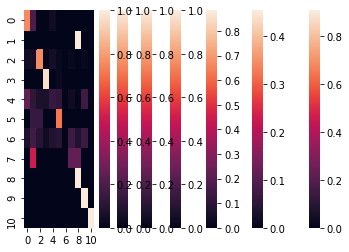

In [65]:
evaluate_learner(learner, val_ru, y_test_number_ru)
evaluate_learner(learner, val_ru100_natasha, y_test_number_ru)
evaluate_learner(learner, val_ru50_natasha, y_test_number_ru)
evaluate_learner(learner, val_ru25_natasha, y_test_number_ru)
evaluate_learner(learner, val_ru10_natasha, y_test_number_ru)
evaluate_learner(learner, val_ru5_natasha, y_test_number_ru)
evaluate_learner(learner, val_ru2_natasha, y_test_number_ru)

___________________
accuracy 0.7971014492753623
___________________
accuracy 0.08902691511387163
___________________
accuracy 0.2567287784679089
___________________
accuracy 0.39544513457556935
___________________


<ipython-input-64-d602c067f592>:12: RuntimeWarning: invalid value encountered in true_divide
  normed_cm = (cm.T / sums).T


accuracy 0.4699792960662526
___________________
accuracy 0.4989648033126294
___________________
accuracy 0.505175983436853


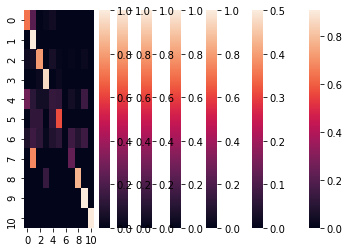

In [66]:
evaluate_learner(learner, val_ru, y_test_number_ru)
evaluate_learner(learner, val_ru100, y_test_number_ru)
evaluate_learner(learner, val_ru50, y_test_number_ru)
evaluate_learner(learner, val_ru25, y_test_number_ru)
evaluate_learner(learner, val_ru10, y_test_number_ru)
evaluate_learner(learner, val_ru5, y_test_number_ru)
evaluate_learner(learner, val_ru2, y_test_number_ru)

['A1' 'A11' 'A12' 'A14' 'A16' 'A17' 'A22' 'A4' 'A7' 'A8' 'A9']

___________________
accuracy 0.6966824644549763
___________________
accuracy 0.12085308056872038
___________________


<ipython-input-64-d602c067f592>:12: RuntimeWarning: invalid value encountered in true_divide
  normed_cm = (cm.T / sums).T


accuracy 0.2014218009478673
___________________
accuracy 0.3127962085308057
___________________
accuracy 0.36255924170616116
___________________
accuracy 0.3909952606635071
___________________
accuracy 0.4075829383886256


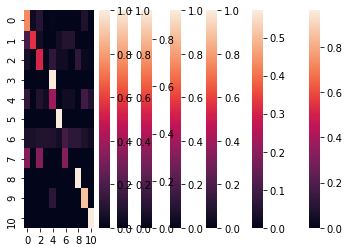

In [67]:
evaluate_learner(learner, val_en, y_test_number_en)
evaluate_learner(learner, val_en100, y_test_number_en)
evaluate_learner(learner, val_en50, y_test_number_en)
evaluate_learner(learner, val_en25, y_test_number_en)
evaluate_learner(learner, val_en10, y_test_number_en)
evaluate_learner(learner, val_en5, y_test_number_en)
evaluate_learner(learner, val_en2, y_test_number_en)